In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica'], 'size':'18'})
rc('text', usetex=True)

We implement equations A2 and A3 of Ribe (1998). The model considers two layers of viscous fluid confined between impermeable and tractionless surfaces. The lower layer has thickness $h_1$, viscosity $\mu_1$ and density $\rho_1$; the upper layer has thickness $h_2 = rh_1$, viscosity $\mu_2 = \gamma \mu_1$ and density $\rho_2 = \rho_1 + \Delta \rho$. The upper surface is at $z=rh_1$ and the lower surface is at $z=-h_1$. The interface is initially located at $z=0$ and is then perturbed such that its subsequent location is $z = h_1\eta(x,y,t)$. Surface tension and inertia are neglected.

For SiO$_2$ we are interested in the case $r \gg 1$. 

The timescale for Rayleigh-Taylor instability is 

$$ \tau = \frac{\mu_1}{\Delta \rho g h_1 \alpha(k,h_1)}$$

where $\alpha(k,h_1)$ is the wavenumber of the instability. The instability with the shortest time constant is the one to grow. 

In [2]:
def get_alpha(k, gamma, r):
    p  = 2*k
    pp = 2*k*r
    s  = np.sinh(p)
    ss = np.sinh(pp)
    c  = np.cosh(p)
    cc = np.cosh(pp)
    
    #print(p, pp, s, ss)
    
    delta = (ss-pp)*(s+p) + 2*gamma*(cc*c - 1.0 + pp*p) + gamma*gamma*(ss+pp)*(s-p)

    return ((ss-pp)*(c-1.0) + gamma*(s-p)*(cc-1.0)) / (p*delta)

In [3]:
secinyr = 60.0 * 60.0 * 24.0 * 365.0

k     = np.logspace(-4,2,100)
gamma = np.logspace(-4,4,5)
alpha = np.zeros([len(k), len(gamma)])
tau   = np.zeros([len(k), len(gamma)])

r     = 1e1
drho  = 400.0
g     = 10.0
mu1   = 1e18
h1    = 1e3

In [4]:
for ii, jj in enumerate(gamma):
    for i, j in enumerate(k):
        alpha[i, ii]  = get_alpha(j, jj, r)
        tau[i, ii]    = mu1 / (drho * g * h1 * alpha[i, ii])

<ipython-input-2-9f6e152aa936>:11: RuntimeWarning: overflow encountered in double_scalars
  delta = (ss-pp)*(s+p) + 2*gamma*(cc*c - 1.0 + pp*p) + gamma*gamma*(ss+pp)*(s-p)
<ipython-input-2-9f6e152aa936>:13: RuntimeWarning: overflow encountered in double_scalars
  return ((ss-pp)*(c-1.0) + gamma*(s-p)*(cc-1.0)) / (p*delta)
<ipython-input-2-9f6e152aa936>:13: RuntimeWarning: invalid value encountered in double_scalars
  return ((ss-pp)*(c-1.0) + gamma*(s-p)*(cc-1.0)) / (p*delta)
<ipython-input-2-9f6e152aa936>:5: RuntimeWarning: overflow encountered in sinh
  ss = np.sinh(pp)
<ipython-input-2-9f6e152aa936>:7: RuntimeWarning: overflow encountered in cosh
  cc = np.cosh(pp)


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


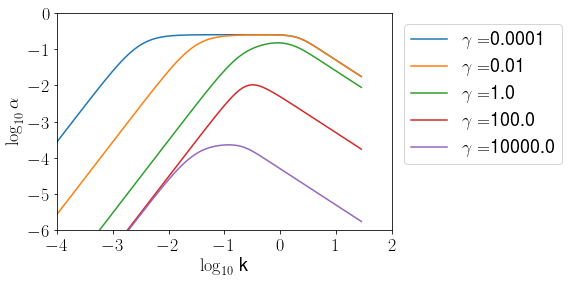

In [5]:
for ii, jj in enumerate(gamma):
    plt.plot(np.log10(k), np.log10(alpha[:,ii]), label="$\gamma = $"+str(jj))

plt.xlabel("$\log_{10}$ k")
plt.ylabel("$\log_{10} \\alpha$")
plt.xlim([-4, 2])
plt.ylim([-6, 0])
plt.legend(bbox_to_anchor=(1.01, 0.99), loc='upper left')

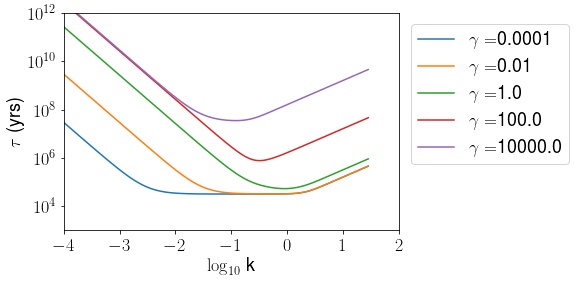

In [6]:
for ii, jj in enumerate(gamma):
    plt.plot(np.log10(k), tau[:,ii]/secinyr, label="$\gamma = $"+str(jj))

plt.yscale("log")
plt.xlabel("$\log_{10}$ k")
plt.ylabel("$\\tau$ (yrs)")
plt.xlim([-4, 2])
plt.ylim([1e3, 1e12])
plt.legend(bbox_to_anchor=(1.01, 0.99), loc='upper left')